### HW1-linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_1=pd.read_csv('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex1-linear regression/ex1data1.txt'
                   ,header=None, names=['Population', 'Profit'])
data_1.insert(0,'x0',value=1)
data_1.head()

,x0,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


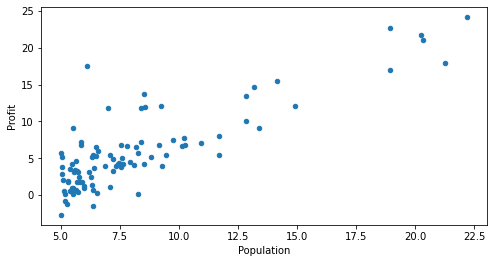

In [3]:
data_1.plot(kind='scatter', x='Population', y='Profit', figsize=(8,4))
plt.show()

In [2]:
#定义代价函数 MSE-矩阵形式。。。
def cost_fun(X,Y,theta):
    inner= np.power((X * theta.T)-Y,2)
    return np.sum(inner)/(2*len(X))

#定义梯度下降函数，来找theta参数
def gradient_des(X,Y,Theta,learn_rate,iter_num): #方程在不断靠近极值，不用找最小值，限制迭代次数为停止条件
    theta_temp= np.matrix(np.zeros(Theta.shape)) # 存theta值 （theta.shape 得到矩阵的shape）
    cost_list=np.zeros(iter_num)  #存每一次的error
    para_num=int(Theta.shape[1])
    
    for i in range(iter_num):
        error=(X * Theta.T)-Y
        for j in range(para_num):
            term=np.multiply(error,X[:,j])
            theta_temp[0,j]=theta_temp[0,j]-learn_rate/len(X)*np.sum(term)
        Theta=theta_temp
        cost_list[i]=cost_fun(X,Y,Theta)
    return Theta,cost_list

In [4]:
#数据处理，增加x0=1 ,取出数据组成 X/Y/theta 三个矩阵
X=np.matrix(data_1.iloc[:,0:2].values)
Y=np.matrix(data_1.iloc[:,2:].values)
theta=np.matrix(np.array([0,0]))

#计算
L_rate=0.01 ; iteration=1000
para,cost=gradient_des(X,Y,theta,L_rate, iteration)
print(para)
print(cost[-1])

[[-3.24140214  1.1272942 ]]
4.515955503078914


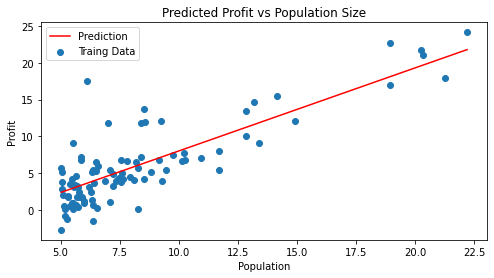

In [21]:
#拟合图像
x=np.linspace(data_1.Population.min(), data_1.Population.max(), 100)
fx=para[0,0]+para[0,1]*x

plt.figure(figsize=(8, 4))
plt.xlabel('Population')
plt.ylabel('Profit')
l1 = plt.plot(x, fx, label='Prediction', color='red')
l2 = plt.scatter(data_1.Population, data_1.Profit, label='Traing Data', )
plt.legend(loc='best')
plt.title('Predicted Profit vs Population Size')
plt.show()

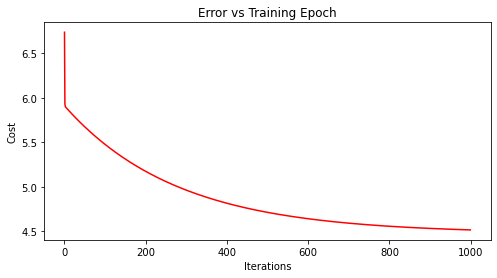

In [23]:
# 画出cost的走势
plt.figure(figsize=(8,4))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs Training Epoch')
plt.plot(np.arange(iteration), cost, 'r')
plt.show()

### multi-variables

In [3]:
data_2=pd.read_csv('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex1-linear regression/ex1data2.txt'
                   ,header=None, names=['Size', 'Number','Price'])
data_2.head()

,Size,Number,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
for string in ['Size', 'Number','Price']:
    temp_mean=np.mean(data_2[string])
    temp_std=np.std(data_2[string])
    data_2[string]=(data_2[string]-temp_mean)/temp_std
data_2.insert(0,'x0',value=1)
data_2.head()

,x0,Size,Number,Price
0,1,0.131415,-0.226093,0.480890
1,1,-0.509641,-0.226093,-0.084983
2,1,0.507909,-0.226093,0.231097
3,1,-0.743677,-1.554392,-0.876398
4,1,1.271071,1.102205,1.612637


In [5]:
#数据处理，增加x0=1 ,取出数据组成 X/Y/theta 三个矩阵
X2=np.matrix(data_2.iloc[:,0:3].values)
Y2=np.matrix(data_2.iloc[:,3:].values)
theta2=np.matrix(np.array([0,0,0]))

#计算
L_rate=0.01 ; iteration=1000
para2,cost2=gradient_des(X2,Y2,theta2,L_rate, iteration)
print(para2)
print(cost2[-1])

[[-9.71799473e-17  8.79065699e-01 -4.74786542e-02]]
0.1335417887907558


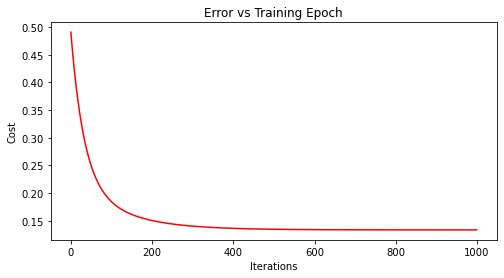

In [6]:
# 画出cost图像
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(iteration), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')
plt.show()